# Data Science and Business Analytics

The Sparks Foundation GRIP August 2021

**Author: Joshua Paul**

# Task 1: Prediction using Supervised ML

**Here we use linear regression to predict a student's score based on his or her hours of study**

In [29]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
#reading data
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data Visualization**

Text(0.5, 1.0, 'Hours vs Score')

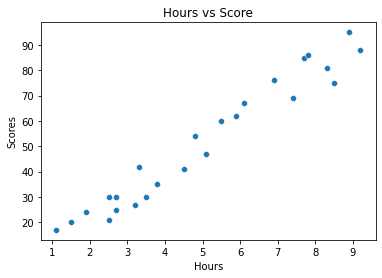

In [4]:
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title('Hours vs Score')

# Prediction

**importing necessary libraries**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report

In [6]:
#X=df['Hours']
X=df.iloc[:,:-1]
X=df.iloc[:,:1]
y=df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Comparing Regression line with values in the dataset**

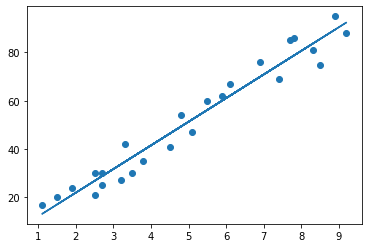

In [7]:
lr=LinearRegression()
lr.fit(X_train,y_train)
line = lr.coef_*X+lr.intercept_
plt.scatter(X,y)
plt.plot(X,line)


In [8]:
pred=lr.predict(X_test)

In [20]:
pr=pd.DataFrame({'Actual':y_test,'Predicted':pred}).sort_values(by='Actual')
pr.reset_index(drop=True,inplace=True)
pr

,Actual,Predicted
0,20,17.053665
1,24,20.969092
2,27,33.694229
3,30,26.842232
4,35,39.567369
5,62,60.123359
6,69,74.806209
7,86,78.721636


**Comparing Actual and Predicted Values**

Text(0.5, 1.0, 'Actual vs Predicted Values')

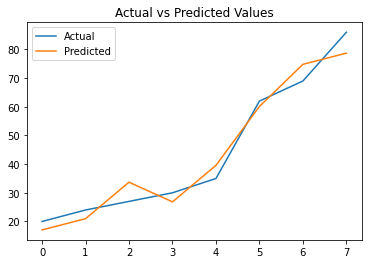

In [25]:
pr.plot()
plt.title('Actual vs Predicted Values')

**Predicting Score with custom Hour value**

In [10]:
hours=9.25
hours=np.reshape(hours,(1,1))
pre=lr.predict(hours)
pre
print('Number of hours = ',hours[0][0])
print("Predicted Score = ",pre[0])

Number of hours =  9.25
Predicted Score =  92.91505723477056


# Model Evaluation

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error: ",mean_squared_error(y_test,pred)**0.5)

Mean Absolute Error:  4.419727808027652
Mean Squared Error:  22.96509721270043
Root Mean Squared Error:  4.792191274636315
